In [1]:
import time
import mlrose_hiive as mlrh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

random_state = 1000
np.random.seed(1)

# Knapsack Problem

In [2]:
# Problem definition for comparison
knapsack_len=200
# weights between 1 to 11
knapsack_weights=np.random.randint(10,size=knapsack_len) + 1
# values between 1 to 21
knapsack_values=np.random.randint(20,size=knapsack_len) + 1
max_weight_pct = 0.5
prob = mlrh.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

experiment_name = "knapsack"
output_directory = "knapsack"

## Mimic

In [3]:
mmc = mlrh.MIMICRunner(problem=prob,
                       experiment_name=experiment_name,
                       output_directory=output_directory,
                       seed=random_state,
                       population_sizes=[1000, 2000, 3000],
                       keep_percent_list=[0.1, 0.15, 0.20],
                       iteration_list=[50],
                       max_attempts=100,
                       use_fast_mimic=True)
mmc_stats, mmc_curve = mmc.run()

In [4]:
columns = ['Time', 'Fitness', 'Population Size', 'Keep Percent']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./knapsack/knapsack/mimic__knapsack__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Population Size,Keep Percent
9,30.405485,1699.0,2000,0.15
5,16.390886,1699.0,1000,0.20
15,50.764678,1699.0,3000,0.15
13,58.966737,1699.0,3000,0.10
11,26.250055,1699.0,2000,0.20
17,46.159709,1699.0,3000,0.20
7,42.389437,1698.0,2000,0.10
1,21.105957,1694.0,1000,0.10
3,16.851590,1694.0,1000,0.15
6,0.018654,0.0,2000,0.10


In [5]:
best_index_in_curve = mmc_curve.Fitness.idxmax()
best_kp = mmc_curve.iloc[best_index_in_curve]['Keep Percent']
best_pz = mmc_curve.iloc[best_index_in_curve]['Population Size']
best_curve_mmc = mmc_curve.loc[(mmc_curve['Keep Percent'] == best_kp) & (mmc_curve['Population Size'] == best_pz)]
best_curve_mmc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

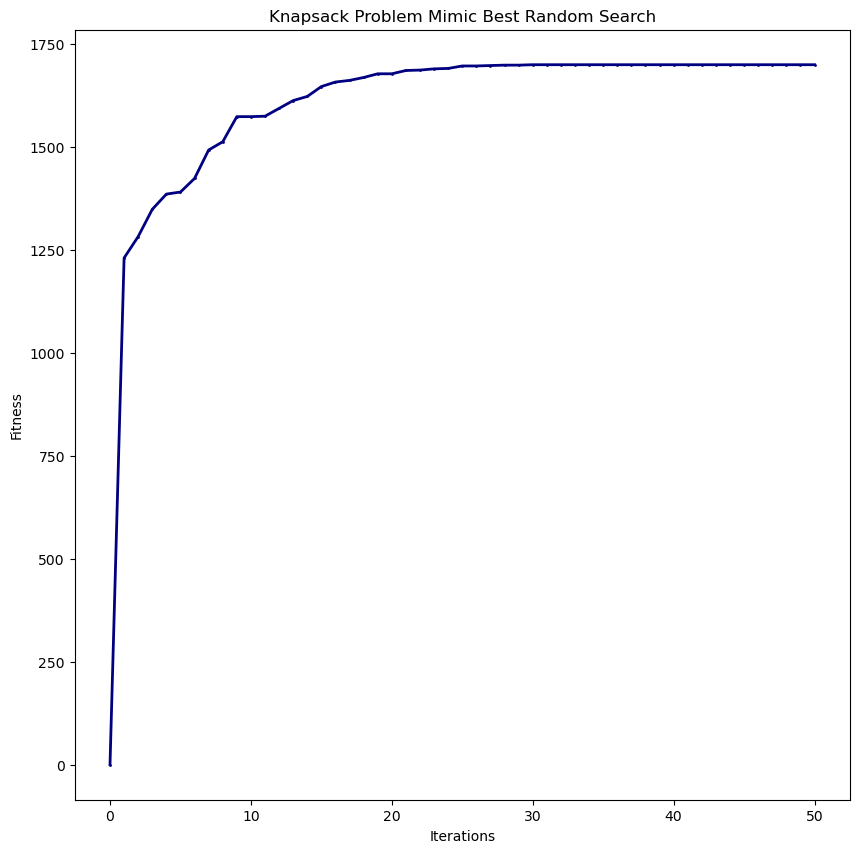

In [6]:
ax = best_curve_mmc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Knapsack Problem Mimic Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Genetic Algorithm

In [7]:
ga = mlrh.GARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=100,
                   iteration_list=[50],
                   population_sizes=[500, 1000, 2000, 3000],
                   mutation_rates=[0.1, 0.25, 0.5])
ga_stats, ga_curve = ga.run()

In [8]:
columns = ['Time', 'Fitness', 'Population Size', 'Mutation Rate']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./knapsack/knapsack/ga__knapsack__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Population Size,Mutation Rate
21,5.978303,1642.0,3000,0.25
7,1.347944,1633.0,1000,0.10
13,3.450539,1632.0,2000,0.10
19,5.981530,1631.0,3000,0.10
23,6.064297,1630.0,3000,0.50
15,3.476758,1630.0,2000,0.25
11,1.417321,1624.0,1000,0.50
9,1.360173,1619.0,1000,0.25
17,3.513715,1616.0,2000,0.50
3,0.595211,1614.0,500,0.25


In [9]:
best_index_in_curve = ga_curve.Fitness.idxmax()
best_mr = ga_curve.iloc[best_index_in_curve]['Mutation Rate']
best_pz = ga_curve.iloc[best_index_in_curve]['Population Size']
best_curve_ga = ga_curve.loc[(ga_curve['Mutation Rate'] == best_mr) & (ga_curve['Population Size'] == best_pz)]
best_curve_ga.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

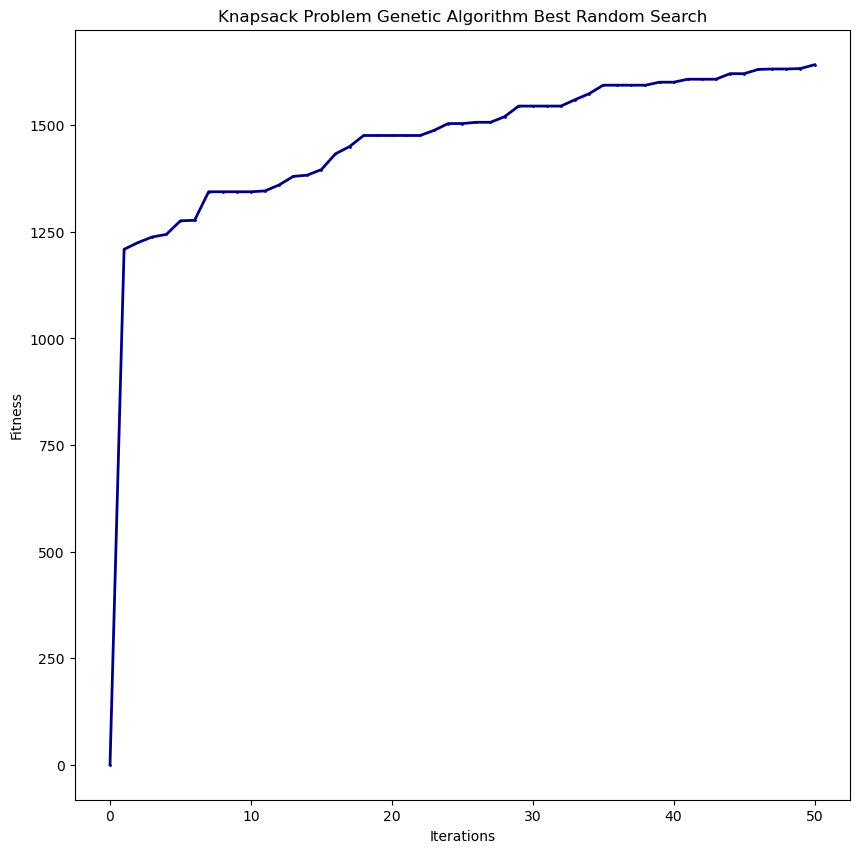

In [10]:
ax = best_curve_ga.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Knapsack Problem Genetic Algorithm Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Simulated Annealing

In [11]:
sa = mlrh.SARunner(problem=prob,
                   experiment_name=experiment_name,
                   output_directory=output_directory,
                   seed=random_state,
                   max_attempts=500,
                   iteration_list=[5000],
                   temperature_list=[0.05, 0.1, 0.5, 1, 10, 20, 25],
                   decay_list=[mlrh.GeomDecay, mlrh.ExpDecay, mlrh.ArithDecay])
sa_stats, sa_curve = sa.run()

In [12]:
columns = ['Time', 'Fitness', 'Temperature', 'schedule_type']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./knapsack/knapsack/sa__knapsack__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Temperature,schedule_type
39,0.216424,1387.0,25.0,exponential
33,0.192022,1370.0,20.0,exponential
23,0.256504,1260.0,1.0,arithmetic
27,0.101511,1232.0,10.0,exponential
35,2.065452,1231.0,20.0,arithmetic
37,0.126450,1215.0,25.0,geometric
29,2.029599,1203.0,10.0,arithmetic
41,2.091934,1176.0,25.0,arithmetic
31,0.091869,1155.0,20.0,geometric
25,0.074383,1130.0,10.0,geometric


In [13]:
best_index_in_curve = sa_curve.Fitness.idxmax()
best_T = sa_curve.iloc[best_index_in_curve].Temperature
best_curve_sa = sa_curve.loc[sa_curve.Temperature == best_T, :]
best_curve_sa.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

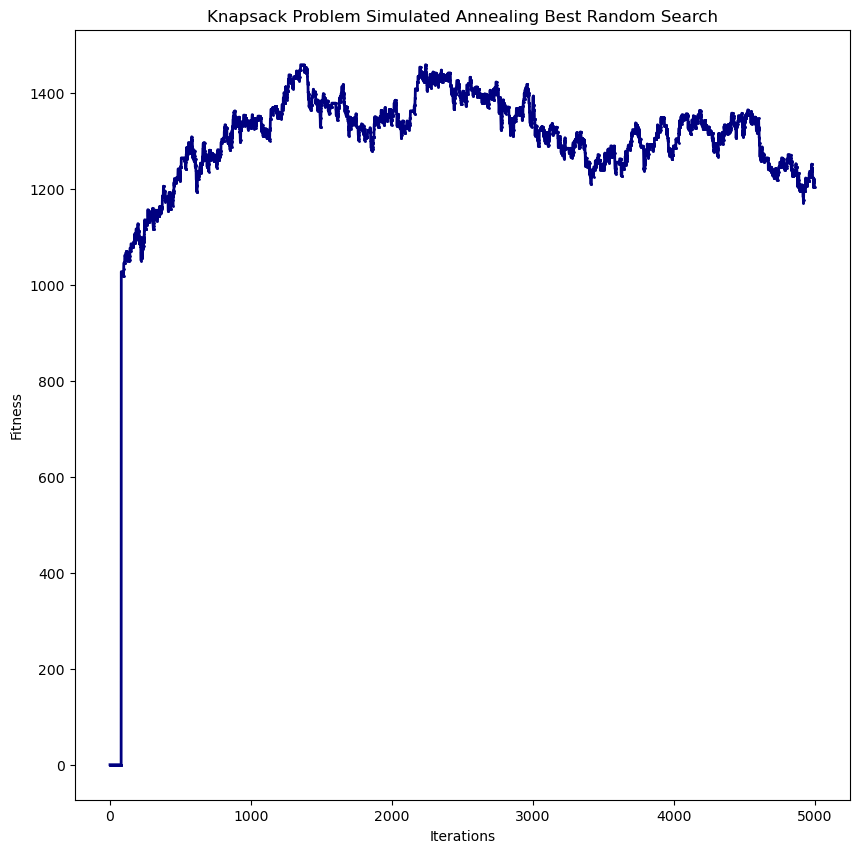

In [14]:
ax = best_curve_sa.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Knapsack Problem Simulated Annealing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Randomized Hill Climbing

In [15]:
rhc = mlrh.RHCRunner(problem=prob,
                    experiment_name=experiment_name,
                    output_directory=output_directory,
                    seed=random_state,
                    max_attempts=500,
                    iteration_list=[5000],
                    restart_list=[10])
rhc_stats, rhc_curve = rhc.run()

In [16]:
columns = ['Time', 'Fitness', 'Restarts', 'current_restart']
pd.set_option('display.max_rows',10)
df=pd.read_csv("./knapsack/knapsack/rhc__knapsack__run_stats_df.csv")
df[columns].sort_values(by=['Fitness'], ascending=False).head(10)

,Time,Fitness,Restarts,current_restart
1,0.029884,1204.0,10,0
5,0.273217,1167.0,10,2
3,0.152394,1154.0,10,1
7,0.437902,1128.0,10,3
11,0.892595,1121.0,10,5
4,0.157952,1106.0,10,2
2,0.079659,1020.0,10,1
6,0.280564,1018.0,10,3
19,2.328356,1008.0,10,9
18,1.905085,847.0,10,9


In [17]:
best_index_in_curve = rhc_curve.Fitness.idxmax()
best_cr = rhc_curve.iloc[best_index_in_curve].current_restart
best_curve_rhc = rhc_curve.loc[rhc_curve.current_restart == best_cr, :]
best_curve_rhc.reset_index(inplace=True)

Text(0, 0.5, 'Fitness')

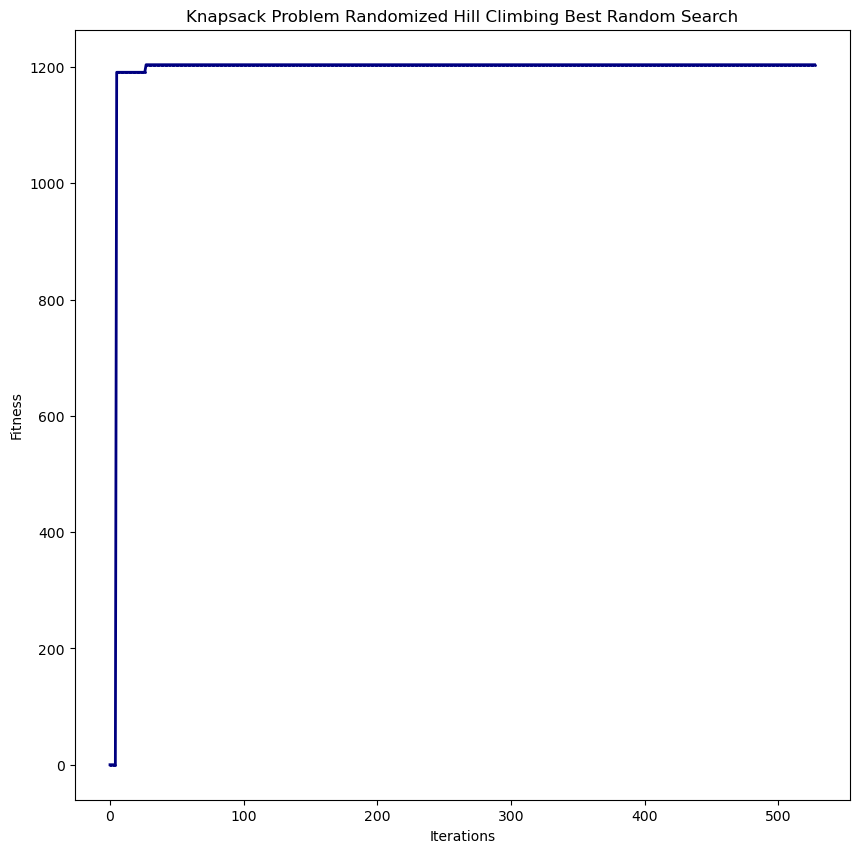

In [18]:
ax = best_curve_rhc.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2,
                             title='Knapsack Problem Randomized Hill Climbing Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness")

## Fitness vs iterations

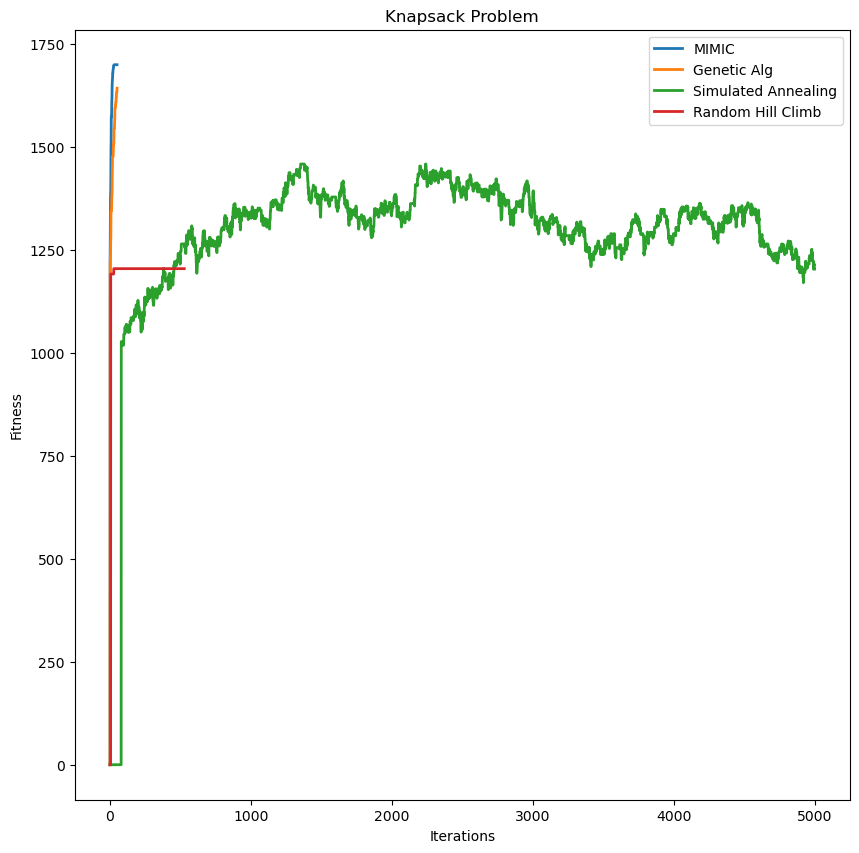

In [19]:
all_curves = {"MIMIC": best_curve_mmc.Fitness, "Genetic Alg": best_curve_ga.Fitness, "Simulated Annealing": best_curve_sa.Fitness, "Random Hill Climb": best_curve_rhc.Fitness}

np.array([len(x) for x in all_curves]).max()

plt.xlabel("Iterations")
plt.ylabel("Fitness")
plt.title("Knapsack Problem")

for name, curve in all_curves.items():
    plt.plot(range(len(curve)), curve, label=name, lw=2)

    plt.legend(loc="best")
plt.show()

## Function Evaluation vs Input Size

In [29]:
def prob_gen(input=150):
    knapsack_len=input
    # weights between 10 to 40
    knapsack_weights=np.random.randint(10,size=knapsack_len) + 1
    # values between 20 to 30
    knapsack_values=np.random.randint(20,size=knapsack_len) + 1
    max_weight_pct = 0.5
    prob = mlrh.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

    return prob

In [30]:
def eval_count_mimic(prob):
    s = time.time()
    max_attempts = 10
    max_iters = 25
    keep_pct=0.25
    pop_size = 1000

    best_state, best_fitness, mimic_curve = mlrh.mimic(prob,
                                             max_attempts=max_attempts,
                                             max_iters=max_iters,
                                             random_state=random_state,
                                             pop_size=pop_size,
                                             keep_pct=keep_pct,
                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(mimic_curve), t_diff)
    return result

In [31]:
def eval_count_gen(prob):
    s = time.time()
    max_attempts = 100
    max_iters = 50
    mutation_prob=0.25
    pop_size = 3000
    best_state, best_fitness, gen_curve = mlrh.genetic_alg(prob,
                                                   max_attempts=max_attempts,
                                                   max_iters=max_iters,
                                                   random_state=random_state,
                                                   pop_size=pop_size,
                                                   mutation_prob=mutation_prob,
                                                   curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(gen_curve), t_diff)
    return result

In [32]:
def eval_count_sa(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    init_temp = 1
    schedule = mlrh.ExpDecay(init_temp)
    best_state, best_fitness, sa_curve = mlrh.simulated_annealing(prob,
                                                             max_attempts=max_attempts,
                                                             max_iters=max_iters,
                                                             random_state=random_state,
                                                             schedule=schedule,
                                                             curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(sa_curve), t_diff)
    return result

In [33]:
def eval_count_rhc(prob):
    s = time.time()
    max_attempts = 500
    max_iters = 5000
    restarts = 10
    best_state, best_fitness, rhc_curve = mlrh.random_hill_climb(prob,
                                                         max_attempts=max_attempts,
                                                         max_iters=max_iters,
                                                         random_state=random_state,
                                                         restarts=restarts,
                                                         curve=True)
    e = time.time()
    t_diff = e-s
    result = (len(rhc_curve), t_diff)
    return result

In [34]:
np.random.seed(1)
inputs = range(10, 110, 10)

mimic_curve_eval = [eval_count_mimic(prob_gen(x)) for x in inputs]
gen_curve_eval = [eval_count_gen(prob_gen(x)) for x in inputs]
sa_curve_eval = [eval_count_sa(prob_gen(x)) for x in inputs]
rhc_curve_eval = [eval_count_rhc(prob_gen(x)) for x in inputs]

all_curves = {"MIMIC": mimic_curve_eval,
              "Genetic Alg": gen_curve_eval,
              "Simulated Annealing": sa_curve_eval,
              "Random Hill Climb": rhc_curve_eval}


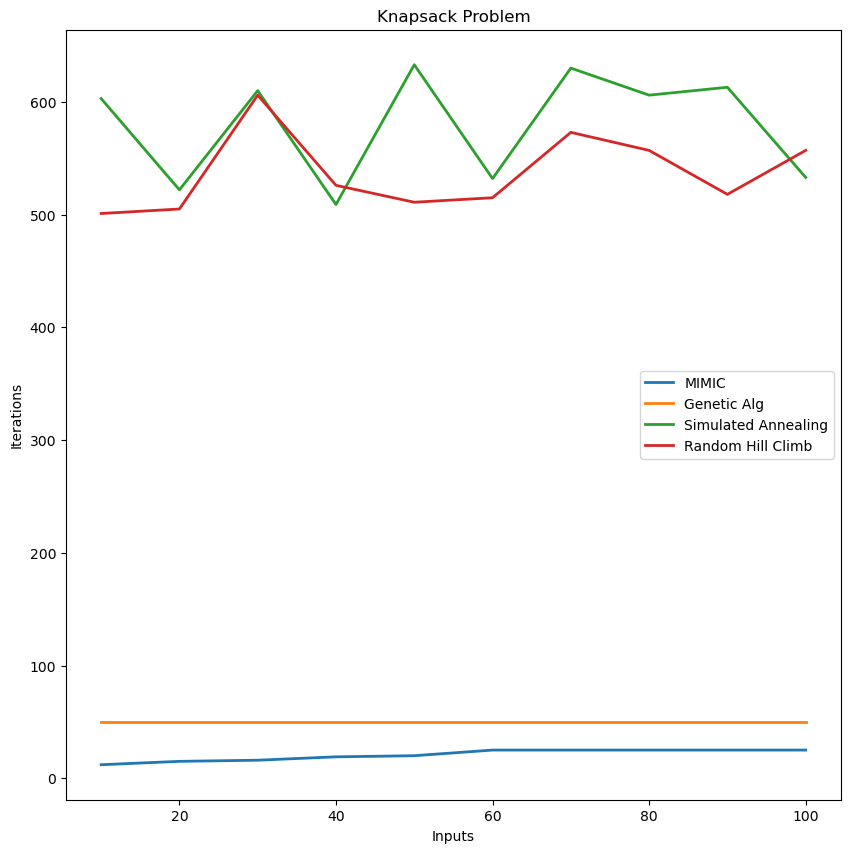

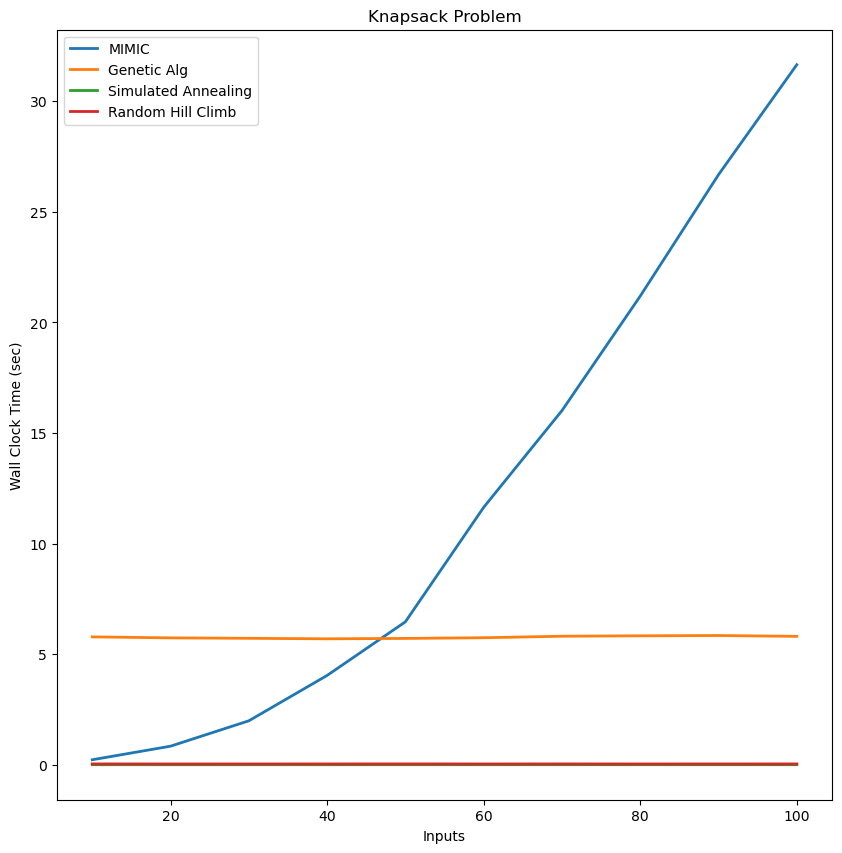

In [35]:
l = [("Inputs", "Iterations"),
     ("Inputs", "Wall Clock Time (sec)")]

for i in range(2):
    plt.xlabel(l[i][0])
    plt.ylabel(l[i][1])
    plt.title("Knapsack Problem")

    for name, curve in all_curves.items():
        plt.plot(inputs, [x[i] for x in curve], label=name, lw=2)

        plt.legend(loc="best")
    plt.show()

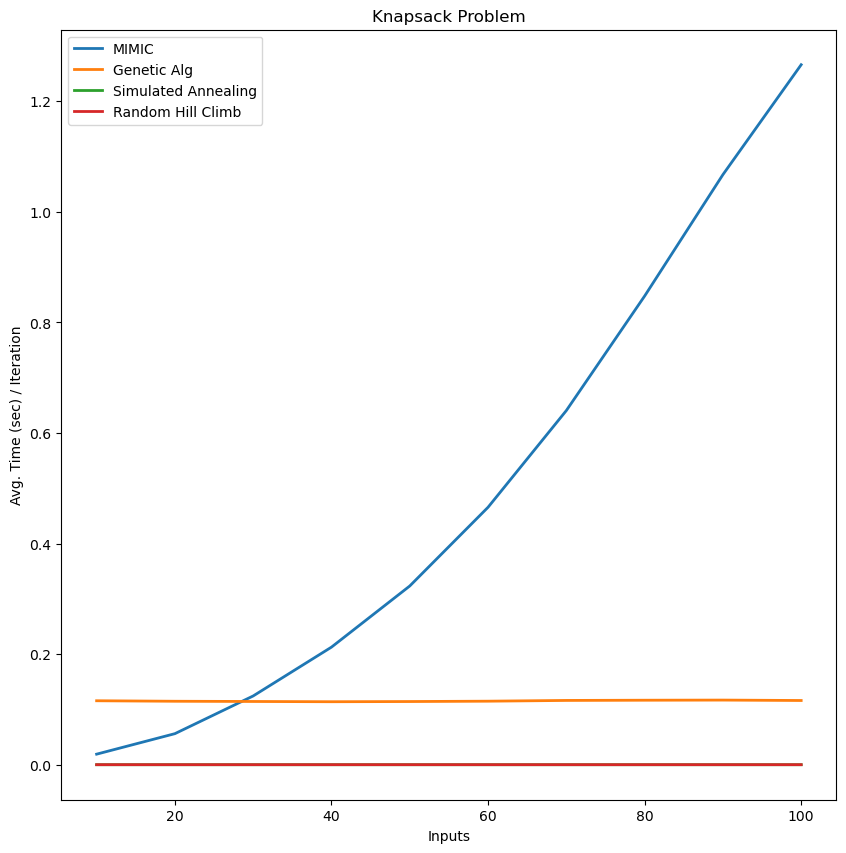

In [36]:
plt.xlabel("Inputs")
plt.ylabel("Avg. Time (sec) / Iteration")
plt.title("Knapsack Problem")

for name, curve in all_curves.items():
    avg_time_div_iterations = np.array([x[1] for x in curve]) / np.array([x[0] for x in curve])
    plt.plot(inputs, avg_time_div_iterations, label=name, lw=2)

    plt.legend(loc="best")
plt.show()